In [1]:
from datetime import datetime
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding,Dense
from tensorflow.keras import Sequential
from sklearn.metrics import r2_score
import pandas as pd
import pandas as pd
print(tf.__version__)

2.7.0


## Tarea 4 del curso: Hello world !! con Tensorflow 2. Una Introducción a Deep Learning

## Punto 1.  Entrenamiento de red neuronal para regresion

In [ ]:
df_train=pd.read_csv('training.csv')
df_test=pd.read_csv('validation.csv')
df_train.head()

,A,B,C,D,E,Y
0,0.920574,0.326861,0.527807,0.203113,0.994426,1.306219
1,0.484593,0.108276,0.388172,0.465689,0.173284,1.358122
2,0.827789,0.865967,0.930056,0.558215,0.152119,2.302618
3,0.205889,0.216347,0.878902,0.329863,0.244587,0.734088
4,0.066839,0.429225,0.497779,0.009710,0.271564,0.806973


In [ ]:
def data_load_sequential(df,shuffle_train=True ,batch_=10):
    data_ds = tf.data.Dataset.from_tensor_slices((df.iloc[:,:-1],df.iloc[:,-1]))
    data_ds = data_ds.cache()
    if shuffle_train:
        #complete_codigo
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds
data_train = data_load_sequential(#complete_codigo)
data_test = data_load_sequential(#complete_codigo)

In [ ]:
## Definir variables
Nodo_interno=20
Lambda_reg = 0.01

w1=tf.Variable(tf.random.normal([5, Nodo_interno],dtype=tf.float64))
b1 = tf.Variable(tf.zeros([Nodo_interno,],dtype=tf.float64))
w2=tf.Variable(tf.random.normal([Nodo_interno, 1],dtype=tf.float64))
b2 = tf.Variable(tf.zeros([1,],dtype=tf.float64))


## Salida de la red neuronal (prediccion y_pred)
def output_(w1,w2,b1,b2,x,activation=tf.keras.activations.tanh):

    y1 = tf.add(tf.matmul(x,w1),b1)    
    y1 =activation(y1)  
    y_pred = #complete codigo
    return  y_pred

## Funcion de costo: regresion=>MSE
def loss_mse(y_pred,y,w1,w2,regularizacion=False,lambda_reg =Lambda_reg):
    mse = tf.reduce_mean(tf.square(y_pred-y))
    if regularizacion:
        L2_regularization_cost = (tf.reduce_mean(tf.math.square(w1)) +
         tf.reduce_mean(tf.math.square(w1)))*lambda_reg/2.
        mse +=L2_regularization_cost
    return mse
        
    
    
Epocas=100
loss_hist = []
loss_hist_val = []
loss_batch =[]
##Learning rate
learning_rate=0.1
for st in range(Epocas):  ## Loop de epocas
    for dsx, dsy  in data_train: ## Loop de datos de entrenamiento
        ## Gradiente
        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch([#complete codigo])
            
            y_pred = output_(w1,w2,b1,b2,dsx)
            ## Calcular funcion de costo
            loss = loss_mse(y_pred,dsy,w1,w2,regularizacion=True)
        ## Calcular gradiente respecto a w,b
        dl_dw1,dl_db1,dl_dw2,dl_db2 = tape.gradient(loss, [w1,b1,w2,b2])
        ## Actualizar pesos y bias
        w1 = w1 - learning_rate * dl_dw1
        #complete codigo
        #complete codigo
        #complete codigo
        loss_batch.append(loss.numpy())

    
    
    loss_epoc = np.mean(loss_batch)
    loss_hist.append(loss_epoc)

    if st%10==0:
        print('epoch: {}; loss_mse_train: {}'.format(st,loss_epoc))

SyntaxError: invalid syntax (<ipython-input-228-1ba353faa2d9>, line 16)

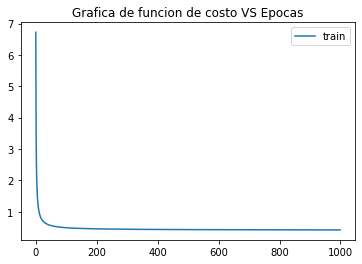

In [ ]:
plt.plot(loss_hist,label='train')
plt.title('Grafica de funcion de costo VS Epocas')
plt.legend()

In [ ]:
loss_t=[]
y_pred=[]
y_test=[]
for dsx_test,dsy_test in data_test:
        y_pred_test = output_(w1,w2,b1,b2,dsx_test)
        loss_batch_test = loss_mse(y_pred_test,dsy_test,w1,w2)
        loss_t.append(loss_batch_test.numpy())
        y_pred.append(y_pred_test.numpy())
        y_test.append(dsy_test.numpy())
loss_test =np.mean(loss_t)
print("Funcion de costo para datos prueba:",loss_test)

Funcion de costo para datos prueba: 0.35122649367921815


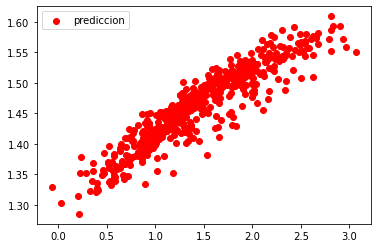

In [ ]:
y_pred_c = np.concatenate(y_pred)
y_test_c = np.concatenate(y_test)
plt.scatter(y_test_c,y_pred_c,color='red', label='prediccion')
plt.legend()

## Modelo de regresion en Sequential TF.

Epoch 1/20
50/50 - 0s - loss: 2.1559 - 352ms/epoch - 7ms/step
Epoch 2/20
50/50 - 0s - loss: 1.0003 - 43ms/epoch - 865us/step
Epoch 3/20
50/50 - 0s - loss: 0.3643 - 36ms/epoch - 725us/step
Epoch 4/20
50/50 - 0s - loss: 0.3051 - 43ms/epoch - 852us/step
Epoch 5/20
50/50 - 0s - loss: 0.2750 - 43ms/epoch - 858us/step
Epoch 6/20
50/50 - 0s - loss: 0.2431 - 51ms/epoch - 1ms/step
Epoch 7/20
50/50 - 0s - loss: 0.2115 - 60ms/epoch - 1ms/step
Epoch 8/20
50/50 - 0s - loss: 0.1785 - 54ms/epoch - 1ms/step
Epoch 9/20
50/50 - 0s - loss: 0.1477 - 54ms/epoch - 1ms/step
Epoch 10/20
50/50 - 0s - loss: 0.1212 - 56ms/epoch - 1ms/step
Epoch 11/20
50/50 - 0s - loss: 0.0965 - 48ms/epoch - 954us/step
Epoch 12/20
50/50 - 0s - loss: 0.0789 - 40ms/epoch - 802us/step
Epoch 13/20
50/50 - 0s - loss: 0.0673 - 44ms/epoch - 888us/step
Epoch 14/20
50/50 - 0s - loss: 0.0597 - 54ms/epoch - 1ms/step
Epoch 15/20
50/50 - 0s - loss: 0.0554 - 57ms/epoch - 1ms/step
Epoch 16/20
50/50 - 0s - loss: 0.0531 - 52ms/epoch - 1ms/step
Ep

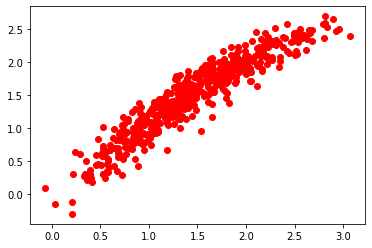

In [ ]:
model = Sequential()
model.add(Dense(20, activation="tanh", input_dim=5, kernel_initializer="uniform"))
model.add(Dense(1, activation="linear", kernel_initializer="uniform"))

# Compile model
OPTIMIZER = 'adam'
model.compile(loss='mse', optimizer=OPTIMIZER)

# Fit the model
model.fit(data_train, epochs=20, batch_size=10,  verbose=2)
PredValSet = model.predict(data_test)
plt.plot(y_test_c,PredValSet,'ro')

## Preguntas:
    1- Modifique los valores de Nodo_interno para encontrar el minimo valor de la funcion de costo(recuerde colocar regularizacion=False).
    2- Modifique los valores de nodo interno y Lambda_reg para encontrar el minimo valor de la funcion de costo (recuerde colocar regularizacion=True).
    3- Cual modelo (entre la primera parte y el usado por tf.keras.Sequence) genera un mayor performance? A que  se debe esto?
    4-  En el modelo construido por tf.keras.Sequence, cambie la variable OPTIMIZER usando tres diferentes metodos: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers. Describa que efectos genera cada metodo en el performance del modelo.

# Parte 2. Preprocesamiento con Sequence. 
### El proposito de este punto es cargar 'mnist' y realizar un preprocesamiento acoplado con el modelo (tf.keras.Sequence), tal que el ingreso de datos sea de solo un tensor de rango 1 (vector), no una imagen!! 

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    name = 'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


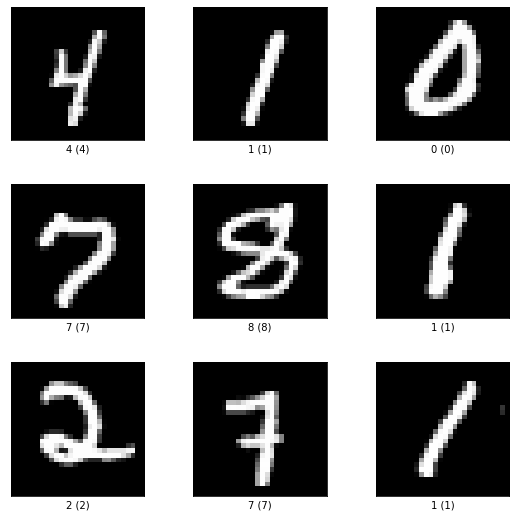

In [3]:
fig = tfds.show_examples(ds_train, ds_info)

In [10]:
def data_load_sequential(data_ds,shuffle_train=True ,batch_=5):
    data_ds = data_ds.cache()
    if shuffle_train:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

data_train = data_load_sequential(ds_train)
data_test = data_load_sequential(ds_test,shuffle_train=False)
for ds,lb in data_train.take(1):
    print(ds.shape,lb)
shaped=ds[0].numpy().shape

(5, 28, 28, 1) tf.Tensor([1 1 7 9 4], shape=(5,), dtype=int64)


In [11]:
from tensorflow.keras import layers, Sequential
trainprocess = Sequential([
        ## Normalize pixeles                   
        layers.Rescaling(scale=1.0 / 255),
        
        ## Genere un tensor de rango 1 a partir de la imagen (flatten!!)
        layers.#complete codigo
    ],name='preprocess')

In [13]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=shaped))
##Agregue la capa de preprocesamiento
model.add(#complete codigo)
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# Punto 3. Conceptos. Machine Learning  
### En el readme.md del repositorio de la tarea, reponda lo siguiente:
    1- Que son los datos de entrenamiento, validacion y prueba (train-test-validation)?
    2- Describa tres funciones de costo para clasificacion y regresion. (https://www.tensorflow.org/api_docs/python/tf/keras/losses)
    3-  Cual es la diferencia entre: BinaryCrossentropy, CategoricalCrossentropy y SparseCategoricalCrossentropy ?